# Ejemplo de Red Neuronal de Convolución

In [10]:
#Capa de pooling es la capa de disminución de reducción de tamaño de la imagen. La idea es tomar una pequeña regíon
#y encontrar el valor máximo, el cual será el primer pixel en la imagen reducida

%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

mnist= input_data.read_data_sets('MNIST_data/', one_hot=True) # Estas imagenes viene como vectores unidimensionales

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Creación de funciones

strides=(1,1,1,1) Se va a mover el nucleo de convolución de 1 pixel al siguiente 
tanto de izquierda a derecha como de arriba a abajo. El parametro 2 y 3 dice cada cuanto se mueve horizontal y vertical
padding='SAME' Computaria el kernel hasta el último pixel de la imagen y de ahi rellene los valores que qudan afuera como ceros

ksize=[1,2,2,1]=Tamaño del kernel Seria de 2x2

strides=[1,2,2,1] en la función max_pool2D se mueve dos posiciones a la derecha y dos posiciones abajo para evitar solapamientos en el kernel y que no repita información.



In [11]:
# Función para crear valores iniciales de los parámetros podría ser una distribución normal o Uniforme. 
#Retorna una distribución normal con desviación estandar 0.01 y la forma de la matriz
def weigth_variable(shape):
    init=tf.random_normal(shape, stddev=0.01)
    return(tf.Variable(init))
# Función de convolución en 2D . Devuelve la operación de convolucion de tensor flow. La convolución es el proceso de 
#generar un mapa a partir de una imagen

def convolucion2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1], padding='SAME') 


## Definimos función que devuelve  un kernel o filtro de 2x2 y genera el pooling  o reducción de información 
# usando el valor máximo y evita solapamiento porque se mueve de a dos pixeles
def max_pool2D(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

Redimensionando el tamaño del vector de entrada:

Aquí se define los flujos que entran que empieza siendo un vector de pixeles, el cual despues se le hace un reshape para que quede como una imagen de 2x2

In [12]:
x= tf.placeholder(tf.float32, [None,784])
y_= tf.placeholder(tf.float32, [None,10]) # 10 por cada categoría de la capa de salida. Estos son los valores 
#de sálida reales

# Necesitamos hacer un reshape del vector con los pixeles de una dimensión a una matriz de 2 dimensiones. Para ello creamos
# x_image y asi recuperamos la imagen 2x2 que forman los pixeles

x_image=tf.reshape(x, [-1,28,28,1]) 
# el -1 dice que en la primera dimensión debe haber tantas filas como sea necesario
# En la segunda dimension habra 28 características
# En la tercera dimensión tmabién 28 características.
# La imagen está en 1 solo canal de color de grises


Despues hay que acordarse de la imegen con forma matricial de la forma y=W*x +b , para entender porque los sesgos deben tener el mismo tamaño de las columnas de la matriz W que se defina

In [13]:
W_convol= weigth_variable([5,5,1,10]) 
## nucleos de 5x5
## 1, es un solo canal de colores de grises. Mejor dicho no se usará varios colores sino solamente 1
## Se usará 10 neuronas

b_convol= weigth_variable([10])
# Las neuronas de convolución tienen un valor de cantidad de sesgos o bias de dimensión 10 (1 por cada neurona de convolución)


W_fc1=weigth_variable([14*14*10, 400]) 
## Fase de convolución 1: Habra 10 imagenes de 14x14 a traves de una capa de 400 nodos
b_fc1= weigth_variable([400]) # Sesgos de la 2 capa de convolución

W_fc2=weigth_variable([400,10])# Se escogió hacerlo con 400 nodos
b_fc2=weigth_variable([10]) 

Ahora Vamos a definir las diversas operaciones del modelo partiendo de las capas desde el comienzo hasta el final

In [14]:
h_convol=tf.nn.relu(convolucion2d(x_image, W_convol)+ b_convol)
h_pool= max_pool2D(h_convol)
h_pool_flat=tf.reshape(h_pool, [-1,14*14*10]) 
#h_convol: Se usa la h par indicar  las salidas de las capas oculta de la red de convolución 1
# la función de activación relu es una variación de la sigmoide 
#If one component of `shape` is the special value -1, the size of that dimension is computed so that the total size
#remains constant.  In particular, a `shape' of `[-1]` flattens into 1-D.  At most one component of `shape` can be -1.

h_fc1=tf.nn.relu(tf.matmul(h_pool_flat,W_fc1)+ b_fc1)

y= tf.nn.softmax(tf.matmul(h_fc1,W_fc2)+b_fc2) # estos son valores de salida ESTIMADOS

# La softmax normaliza la distribución de probabilidades

mse=tf.reduce_mean( tf.square(y-y_))
train_step= tf.train.AdamOptimizer(0.01).minimize(mse)
# iniciamos sesión de Tensorflow

sess=tf.Session()
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./graphs', sess.graph)


In [ ]:
for i in range(251):
    batchX, batchY= mnist.train.next_batch(1000) # usamos gradiente estocástico
    sess.run(train_step, feed_dict={x:batchX, y_:batchY})
    if (i%25 == 0):
        print('Iteration: '+str(i)+' train MSE:' +str(sess.run(mse, feed_dict={x:batchX, y_:batchY})))
print('Entrenamiento terminado')

Iteration: 0 train MSE:0.0897178
Iteration: 25 train MSE:0.0133895
Iteration: 50 train MSE:0.00625255
Iteration: 75 train MSE:0.00470655
Iteration: 100 train MSE:0.00274679


Calculamos las predicciones

In [8]:
predicciones= sess.run(y, feed_dict={x:mnist.test.images, y_:mnist.test.labels})
predicciones=np.argmax(predicciones, axis=1)

truelabels=np.argmax(mnist.test.labels, axis=1)


Calculamos el error

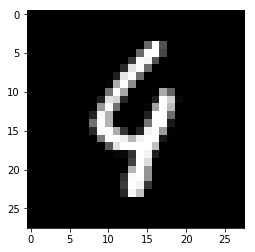

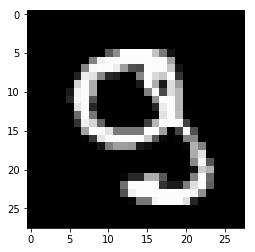

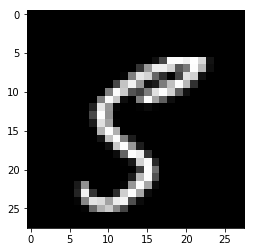

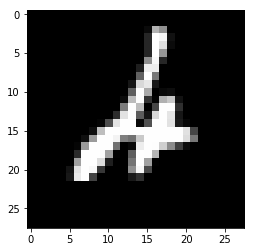

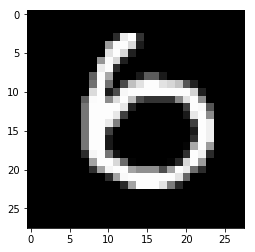

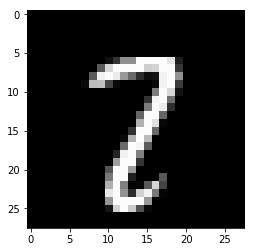

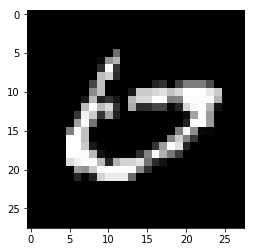

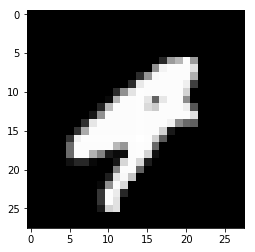

Test Error: 0.0143


In [9]:
errors=0
for i in range(predicciones.shape[0]):
    if (predicciones[i]!=truelabels[i]):
        if (i<500):
            plt.imshow(mnist.test.images[i].reshape(28,28),cmap='gray')
            plt.show()
        errors+=1
print('Test Error: '+str(errors/predicciones.shape[0]))

Vamos a visualizar los Kernels o filtros

(5, 5, 1, 10)


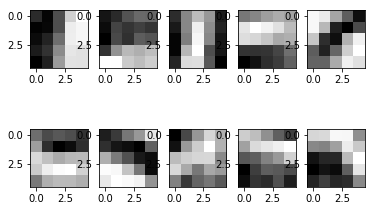

In [85]:
kernels=sess.run(W_convol)
print(kernels.shape)
f, axes= plt.subplots(2,5) # Subplots de 5 filas y dos columnas

for i in range(10): #10 filtros o kernels
    axes.ravel()[i].imshow(kernels[:,:,0,i], cmap='gray', interpolation='none')
    # todas las filas, todas las columnas, con el canal de color 0 (el unicoque que hay), kernel i

Es un kernel de 5x5 con un solo color (1) y se uso 10 neuronas

Ahora vamos a visualizar como quedan las imagenes una vez pasan la capa de convolución

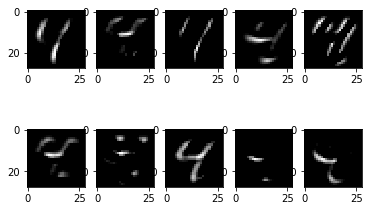

In [83]:
activaciones=sess.run(h_convol, feed_dict={x:mnist.test.images[0:100]})
f, axes= plt.subplots(2,5) # Subplots de 5 filas y dos columnas
index=6 #Escogemos visualizar la imagen No 6
for i in range(10): #10 filtros
    axes.ravel()[i].imshow(activaciones[index,:,:,i], cmap='gray')

In [91]:
?plt.subplots